## Machine Failure Prediction - Sindhura Nadendla

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Importing all the packages

In [3]:
# To read the dataset, and perform basic data quality checks
import pandas as pd

# To preprocess the X data using pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# To perform train test split
from sklearn.model_selection import train_test_split

# To perform model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# To plot confusion matrix and classification report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

## Read the dataset

In [4]:
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Separate X and Y features

In [26]:
X = df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [27]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [28]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Preprocessing on X by using pipeline

In [29]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [30]:
cat

['Type']

In [31]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [32]:
X['Type'].value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

In [33]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [36]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [37]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [38]:
X_pre = pre.fit_transform(X)

In [39]:
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


## Perform train test split on X

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y, test_size=0.2,random_state=1)

In [41]:
xtrain.shape

(109143, 13)

In [42]:
xtest.shape

(27286, 13)

In [43]:
ytrain.shape

(109143, 1)

In [44]:
ytest.shape

(27286, 1)

## Perform Algorithm Evaluation to choose the best algorithm for this model

In [45]:
dct = {'Logistic':LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting':GradientBoostingClassifier()}

In [46]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier())])

### Importing evaluation metrics- f1_score and cross validation score

In [47]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [51]:
train_results = []
test_results = []
train_cv = []

for name,model in dct.items():
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Get F1 macro score for train and test
    f1_train = f1_score(ytrain,ypred_train,average='macro')
    f1_test = f1_score(ytest,ypred_test,average='macro')
    # Cross validate the scores
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
    f1_cv=scores.mean()
    # Append above results in lists
    train_results.append(f1_train)
    test_results.append(f1_test)
    train_cv.append(f1_cv)
    print(f"Results of {name} model")
    print(f"Training Results : {f1_train:.4f}")
    print(f"Testing results : {f1_test:.4f}")
    print(f"Cross Validated Results : {f1_cv:.4f}")
    print("\n =================================================================================================\n")

Results of Logistic model
Training Results : 0.9318
Testing results : 0.9260
Cross Validated Results : 0.9318


Results of Decision Tree model
Training Results : 0.9978
Testing results : 0.8744
Cross Validated Results : 0.8746


Results of Random Forest model
Training Results : 0.9978
Testing results : 0.9270
Cross Validated Results : 0.9309


Results of Gradient Boosting model
Training Results : 0.9373
Testing results : 0.9272
Cross Validated Results : 0.9301




## Create a dataframe to show above results

In [52]:
eval_dct = {'Model Name':list(dct.keys()),
            'Train results':train_results,
            'Test results': test_results,
            'CV score':train_cv}

In [53]:
eval_df = pd.DataFrame(eval_dct)
eval_df.sort_values(by='CV score',ascending=False)

,Model Name,Train results,Test results,CV score
0,Logistic,0.931814,0.926043,0.931810
2,Random Forest,0.997771,0.926984,0.930863
3,Gradient Boosting,0.937252,0.927170,0.930059
1,Decision Tree,0.997769,0.874387,0.874559


## Logistic Regression is performing good among all. Lets tune our model on basis of logistic regression

# Build Logistic model and evaluate the model

In [57]:
best_model = LogisticRegression()
best_model.fit(xtrain,ytrain)

LogisticRegression()

In [61]:
## Lets check the accuracy scores

In [59]:
best_model.score(xtrain,ytrain)

0.9962617849976636

In [60]:
best_model.score(xtest,ytest)

0.995895330938943

In [62]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)

In [63]:
ypred_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [64]:
ytrain.head()

,Machine failure
124260,0
80093,0
67724,0
69128,0
97478,0


In [65]:
ypred_test[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [66]:
ytest.head()

,Machine failure
79960,0
85935,0
35419,0
70369,0
18444,0


## Plot Confusion matrix and classification report to understand accuracy,precision and recall

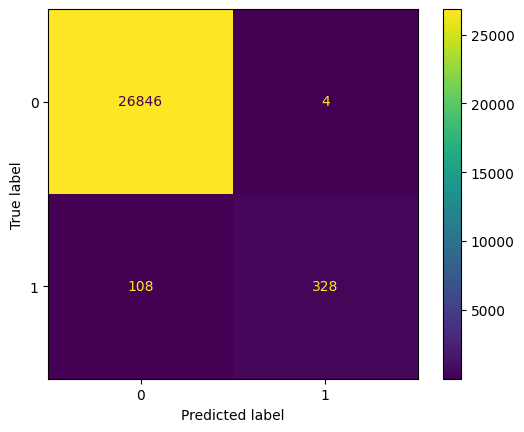

In [67]:
ConfusionMatrixDisplay.from_estimator(best_model,xtest,ytest)

In [68]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26850
           1       0.99      0.75      0.85       436

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



## Lets plot ROC (Receiver Operatoring Characterstic) and AUC curve (Area under curve)

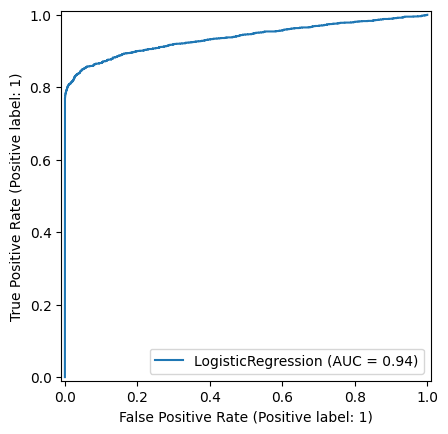

In [69]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

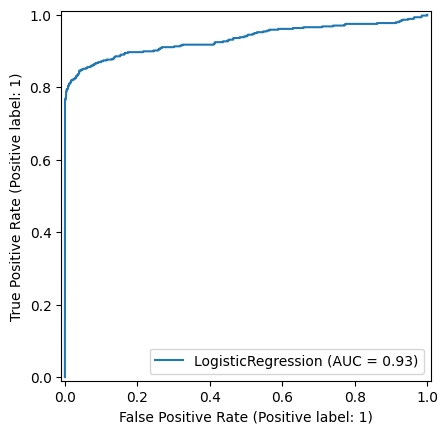

In [70]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

## AUC is greater than 0.8 so this is a very good model. We can proceed with the out of sample prediction

## Out of sample predictions

In [71]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [72]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [73]:
preds = best_model.predict(xnew_pre)
probs = best_model.predict_proba(xnew_pre)

In [74]:
preds[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [75]:
probs

array([[0.9978142 , 0.0021858 ],
       [0.99890928, 0.00109072],
       [0.99750988, 0.00249012],
       ...,
       [0.99746713, 0.00253287],
       [0.99771231, 0.00228769],
       [0.99769759, 0.00230241]])

In [77]:
## the 1st one is the list corresponds to Machine failure:0 and 2nd one in list corresponds to Machine failure:1
## So lets consider the second list item in order to display the probabilities of predicted machine failure

In [79]:
failure_probs = probs[:,1]
failure_probs

array([0.0021858 , 0.00109072, 0.00249012, ..., 0.00253287, 0.00228769,
       0.00230241])

## Save above results to a dataframe

In [80]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [82]:
df_final['Machine Failure Predicted'] = preds
df_final['Failure Probability'] = failure_probs

In [83]:
df_final.head()

,id,Machine Failure Predicted,Failure Probability
0,136429,0,0.002186
1,136430,0,0.001091
2,136431,0,0.002490
3,136432,0,0.003456
4,136433,0,0.003693


In [84]:
df_final.to_csv('MachineFailureResults.csv',index=False)